In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [376]:
df_clients = pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','2_detail_table_customers.xls'))
df_depot = pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','4_detail_table_depots.xls'))

In [377]:
# Extraction des informations pertinentes pour les clients
columns_clients = ["CUSTOMER_NUMBER", "CUSTOMER_LATITUDE", "CUSTOMER_LONGITUDE"]
data_clients = df_clients[columns_clients].rename(columns={"CUSTOMER_NUMBER": "number", "CUSTOMER_LATITUDE": "x", "CUSTOMER_LONGITUDE": "y"})
data_clients = data_clients.head(30)
NUM_CLIENTS=len(data_clients)

In [378]:
# Extraction des informations pertinentes pour le dépôt
depot_info = df_depot[['DEPOT_CODE', 'DEPOT_LATITUDE', 'DEPOT_LONGITUDE']].drop_duplicates()
depot_info = depot_info.rename(columns={"DEPOT_CODE": "number", "DEPOT_LATITUDE": "x", "DEPOT_LONGITUDE": "y"})

# Ajout du dépôt aux données clients
"""data_clients.loc[len(data_clients)] = depot_info.iloc[0]
data_clients[['x', 'y']] = data_clients[['x', 'y']]
# Constantes pour les positions des clients et du dépôt

DEPOT = (data_clients.iloc[-1]['x'], data_clients.iloc[-1]['y'])"""
client_positions = list(zip(data_clients['x'], data_clients['y']))

In [379]:
print(len(client_positions))
print(NUM_CLIENTS)
print(client_positions)

30
30
[(43.41305, 17.87588), (43.135963, 17.776839), (43.46907801, 17.33702249), (43.70716, 17.2229), (43.08222786, 17.96003741), (43.46470189, 17.31043644), (43.35266, 17.80444), (43.48189308, 17.30045863), (43.35459, 17.79902), (43.396088, 17.871369), (43.71657, 17.23185), (43.11036, 17.70165), (43.71619, 17.2317), (43.54998018, 17.42732548), (43.475001, 17.325417), (43.33841, 17.79242), (43.111171, 17.69928539), (43.34568, 17.80545), (43.36378, 17.82157), (43.32605, 17.82229), (43.224819, 17.695885), (43.71695937, 17.23264032), (43.46991226, 17.3333838), (43.36369616, 17.8181746), (43.34521, 17.7901), (43.71342, 17.23878), (43.429906, 17.7661), (43.11155, 17.71267), (43.586910367012, 17.298542261123), (43.71763, 17.22673)]


In [380]:
import math
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, p):
        xDis = self.x - p.x
        yDis = self.y - p.y
        distance = math.sqrt(xDis ** 2 + yDis ** 2)
        return distance
    
    def __repr__(self):
        return f"({self.x},{self.y})"

In [381]:
pointsL=[]
for element in client_positions:
    pointsL.append(Point((element[0]),(element[1])))
print(pointsL)


[(43.41305,17.87588), (43.135963,17.776839), (43.46907801,17.33702249), (43.70716,17.2229), (43.08222786,17.96003741), (43.46470189,17.31043644), (43.35266,17.80444), (43.48189308,17.30045863), (43.35459,17.79902), (43.396088,17.871369), (43.71657,17.23185), (43.11036,17.70165), (43.71619,17.2317), (43.54998018,17.42732548), (43.475001,17.325417), (43.33841,17.79242), (43.111171,17.69928539), (43.34568,17.80545), (43.36378,17.82157), (43.32605,17.82229), (43.224819,17.695885), (43.71695937,17.23264032), (43.46991226,17.3333838), (43.36369616,17.8181746), (43.34521,17.7901), (43.71342,17.23878), (43.429906,17.7661), (43.11155,17.71267), (43.586910367012,17.298542261123), (43.71763,17.22673)]


In [382]:
def split_list(input_list, n):
    sublist_size = len(input_list) // n
    remainder = len(input_list) % n
    sublists = []
    index = 0
    for i in range(n):
        sublist = input_list[index:index + sublist_size]
        if remainder > 0:
            sublist.append(input_list[index + sublist_size])
            remainder -= 1
            index += sublist_size + 1
        else:
            index += sublist_size
        sublists.append(sublist)
    return sublists
n=4

In [383]:
def createIt(pointsList):
    return random.sample(pointsList, len(pointsList))

i1=split_list(createIt(pointsL),n)
i2=split_list(createIt(pointsL),n)
print(i1)
print(i2)

[[(43.36369616,17.8181746), (43.224819,17.695885), (43.71657,17.23185), (43.71763,17.22673), (43.71695937,17.23264032), (43.71342,17.23878), (43.111171,17.69928539), (43.35459,17.79902)], [(43.32605,17.82229), (43.34521,17.7901), (43.429906,17.7661), (43.54998018,17.42732548), (43.11036,17.70165), (43.41305,17.87588), (43.36378,17.82157), (43.46991226,17.3333838)], [(43.48189308,17.30045863), (43.34568,17.80545), (43.46470189,17.31043644), (43.70716,17.2229), (43.35266,17.80444), (43.46907801,17.33702249), (43.08222786,17.96003741)], [(43.33841,17.79242), (43.396088,17.871369), (43.135963,17.776839), (43.475001,17.325417), (43.586910367012,17.298542261123), (43.71619,17.2317), (43.11155,17.71267)]]
[[(43.36369616,17.8181746), (43.33841,17.79242), (43.34521,17.7901), (43.35459,17.79902), (43.08222786,17.96003741), (43.32605,17.82229), (43.71619,17.2317), (43.46470189,17.31043644)], [(43.11155,17.71267), (43.135963,17.776839), (43.586910367012,17.298542261123), (43.54998018,17.42732548),

In [384]:
def initialPopulation(popSize, pointsL):
    population = []

    for i in range(popSize):
        population.append(split_list(createIt(pointsL),n))
    return population

#myPop1=initialPopulation(10, pointsL)
myPop2=initialPopulation(7, pointsL)
myPop2

[[[(43.48189308,17.30045863),
   (43.224819,17.695885),
   (43.32605,17.82229),
   (43.111171,17.69928539),
   (43.34521,17.7901),
   (43.71695937,17.23264032),
   (43.71763,17.22673),
   (43.11155,17.71267)],
  [(43.71619,17.2317),
   (43.135963,17.776839),
   (43.396088,17.871369),
   (43.70716,17.2229),
   (43.475001,17.325417),
   (43.46470189,17.31043644),
   (43.586910367012,17.298542261123),
   (43.36369616,17.8181746)],
  [(43.33841,17.79242),
   (43.54998018,17.42732548),
   (43.34568,17.80545),
   (43.36378,17.82157),
   (43.41305,17.87588),
   (43.71342,17.23878),
   (43.11036,17.70165)],
  [(43.429906,17.7661),
   (43.46991226,17.3333838),
   (43.46907801,17.33702249),
   (43.71657,17.23185),
   (43.35266,17.80444),
   (43.35459,17.79902),
   (43.08222786,17.96003741)]],
 [[(43.475001,17.325417),
   (43.111171,17.69928539),
   (43.70716,17.2229),
   (43.08222786,17.96003741),
   (43.34568,17.80545),
   (43.35459,17.79902),
   (43.46907801,17.33702249),
   (43.36369616,17.81

In [385]:

pointDepot=Point(depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])

class Fitness:
    def __init__(self, it):
        self.it = it
        self.distance = 0
        self.fitness= 0.0
    
    def itDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(len(self.it)):
                if i==0 :
                    fromPoint = pointDepot
                    toPoint=self.it[i]
                    pathDistance+=fromPoint.distance(toPoint)
                fromPoint = self.it[i]
                toPoint = None
                if i + 1 < len(self.it):
                    toPoint = self.it[i + 1]
                else:
                    toPoint=pointDepot
                    pathDistance+=fromPoint.distance(toPoint)
                    toPoint = self.it[0]
                pathDistance += fromPoint.distance(toPoint)
            self.distance = pathDistance
        return self.distance
    
    def itFitness(self):
        if self.fitness == 0:
            if float(self.itDistance())==0:
                print(self.it)
            self.fitness = 1 / float(self.itDistance())
        return self.fitness

In [386]:
for i in range(len(myPop2)):
    print(f"individu {i+1}")
    for j in range(n):
        print("\t",f"sous-liste {j+1}")
        print(Fitness(myPop2[i][j]).itFitness())
    print("\n")

individu 1
	 sous-liste 1
0.2670883145153401
	 sous-liste 2
0.24053339224717063
	 sous-liste 3
0.3189596273903623
	 sous-liste 4
0.3647496939885552


individu 2
	 sous-liste 1
0.21967829857854385
	 sous-liste 2
0.26684397839755775
	 sous-liste 3
0.2776907381590241
	 sous-liste 4
0.2354816006933972


individu 3
	 sous-liste 1
0.25835919434314103
	 sous-liste 2
0.25861981731152855
	 sous-liste 3
0.2805701104192305
	 sous-liste 4
0.4472432427414642


individu 4
	 sous-liste 1
0.2203206027667939
	 sous-liste 2
0.33104835466203986
	 sous-liste 3
0.3896148656835602
	 sous-liste 4
0.21080092052149832


individu 5
	 sous-liste 1
0.27778529442042926
	 sous-liste 2
0.3778064963362544
	 sous-liste 3
0.23300580752078437
	 sous-liste 4
0.2419243037713516


individu 6
	 sous-liste 1
0.31297097457375567
	 sous-liste 2
0.2819285659412548
	 sous-liste 3
0.2749707376228409
	 sous-liste 4
0.3085167673744479


individu 7
	 sous-liste 1
0.310003336108184
	 sous-liste 2
0.21895085338766068
	 sous-liste 3
0.

In [387]:
print(myPop2)
print(len(myPop2))
print(myPop2[0])
print(len(myPop2[0]))
print(myPop2[0][2])

[[[(43.48189308,17.30045863), (43.224819,17.695885), (43.32605,17.82229), (43.111171,17.69928539), (43.34521,17.7901), (43.71695937,17.23264032), (43.71763,17.22673), (43.11155,17.71267)], [(43.71619,17.2317), (43.135963,17.776839), (43.396088,17.871369), (43.70716,17.2229), (43.475001,17.325417), (43.46470189,17.31043644), (43.586910367012,17.298542261123), (43.36369616,17.8181746)], [(43.33841,17.79242), (43.54998018,17.42732548), (43.34568,17.80545), (43.36378,17.82157), (43.41305,17.87588), (43.71342,17.23878), (43.11036,17.70165)], [(43.429906,17.7661), (43.46991226,17.3333838), (43.46907801,17.33702249), (43.71657,17.23185), (43.35266,17.80444), (43.35459,17.79902), (43.08222786,17.96003741)]], [[(43.475001,17.325417), (43.111171,17.69928539), (43.70716,17.2229), (43.08222786,17.96003741), (43.34568,17.80545), (43.35459,17.79902), (43.46907801,17.33702249), (43.36369616,17.8181746)], [(43.224819,17.695885), (43.33841,17.79242), (43.71695937,17.23264032), (43.71763,17.22673), (43.

In [388]:
import operator
def rankIts(population):
    fitnessResults = {}
    for i in range(len(population)):
        somme=0
        for j in range(len(population[i])):
            somme+=Fitness(population[i][j]).itFitness()
            #fitnessResults[i].append((j, Fitness(population[i][j]).itFitness()))
            
        fitnessResults[i] = somme
    ranked_results = sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)
    #print(fitnessResults)
    return ranked_results

popRanked=rankIts(myPop2)

print(popRanked)
print(popRanked[0][1])

[(6, 1.3250780923441683), (2, 1.2447923648153643), (0, 1.1913310281414282), (5, 1.1783870455122991), (3, 1.1517847436338922), (4, 1.1305219020488197), (1, 0.9996946158285229)]
1.3250780923441683


In [389]:

import pandas as pnd
import numpy as np
selectionResults = []
df = pnd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
df


,Index,Fitness
0,6.0,1.325078
1,2.0,1.244792
2,0.0,1.191331
3,5.0,1.178387
4,3.0,1.151785
5,4.0,1.130522
6,1.0,0.999695


In [390]:
df['cum_sum'] = df.Fitness.cumsum()
df

,Index,Fitness,cum_sum
0,6.0,1.325078,1.325078
1,2.0,1.244792,2.569870
2,0.0,1.191331,3.761201
3,5.0,1.178387,4.939589
4,3.0,1.151785,6.091373
5,4.0,1.130522,7.221895
6,1.0,0.999695,8.221590


In [391]:
df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
df

,Index,Fitness,cum_sum,cum_perc
0,6.0,1.325078,1.325078,16.117054
1,2.0,1.244792,2.569870,31.257585
2,0.0,1.191331,3.761201,45.747861
3,5.0,1.178387,4.939589,60.080698
4,3.0,1.151785,6.091373,74.089968
5,4.0,1.130522,7.221895,87.840617
6,1.0,0.999695,8.221590,100.000000


In [392]:
selectionResults = []
for i in range(4):
    selectionResults.append(popRanked[i][0])
selectionResults

[6, 2, 0, 5]

In [393]:
for i in range(len(popRanked) - 4):
    pick = random.randint(0,100)
    for i in range(len(popRanked)):
        if pick <= df.iat[i,3]:
            selectionResults.append(popRanked[i][0])
            break
selectionResults

[6, 2, 0, 5, 5, 0, 4]

In [394]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pnd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults
selectionResults= selection(popRanked, 5)
selectionResults


[6, 2, 0, 5, 3, 0, 4]

In [395]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool
matingPool(myPop2,selectionResults)

[[[(43.48189308,17.30045863),
   (43.396088,17.871369),
   (43.33841,17.79242),
   (43.08222786,17.96003741),
   (43.11036,17.70165),
   (43.41305,17.87588),
   (43.111171,17.69928539),
   (43.135963,17.776839)],
  [(43.71695937,17.23264032),
   (43.70716,17.2229),
   (43.46907801,17.33702249),
   (43.34521,17.7901),
   (43.71763,17.22673),
   (43.32605,17.82229),
   (43.46470189,17.31043644),
   (43.34568,17.80545)],
  [(43.475001,17.325417),
   (43.36369616,17.8181746),
   (43.35459,17.79902),
   (43.586910367012,17.298542261123),
   (43.54998018,17.42732548),
   (43.71619,17.2317),
   (43.71657,17.23185)],
  [(43.35266,17.80444),
   (43.46991226,17.3333838),
   (43.71342,17.23878),
   (43.36378,17.82157),
   (43.429906,17.7661),
   (43.11155,17.71267),
   (43.224819,17.695885)]],
 [[(43.71342,17.23878),
   (43.35266,17.80444),
   (43.70716,17.2229),
   (43.36369616,17.8181746),
   (43.48189308,17.30045863),
   (43.46470189,17.31043644),
   (43.71763,17.22673),
   (43.71657,17.23185)

In [396]:
def croisementOr(parent1, parent2):
    parent1copy=[]
    parent2copy=[]
    for i in range(n):
        parent1copy+=parent1[i]
        parent2copy+=parent2[i]
    child = []
    childP1 = []
    childP2 = []
    
    #geneA = int(random.random() * len(parent1))
    #geneB = int(random.random() * len(parent1))
    geneA = random.randint(0,len(parent1copy))
    geneB = random.randint(0,len(parent1copy))
    #print(geneA)
    #print(geneB)
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1copy[i])
        
    childP2 = [item for item in parent2copy if item not in childP1]

    child = childP1 + childP2
    return split_list(child,n)
print("Parent 1 :")
print(i1)
print("Parent 2 :")
print(i2)
print("Enfant :")
croisementOr(i1, i2)

Parent 1 :
[[(43.36369616,17.8181746), (43.224819,17.695885), (43.71657,17.23185), (43.71763,17.22673), (43.71695937,17.23264032), (43.71342,17.23878), (43.111171,17.69928539), (43.35459,17.79902)], [(43.32605,17.82229), (43.34521,17.7901), (43.429906,17.7661), (43.54998018,17.42732548), (43.11036,17.70165), (43.41305,17.87588), (43.36378,17.82157), (43.46991226,17.3333838)], [(43.48189308,17.30045863), (43.34568,17.80545), (43.46470189,17.31043644), (43.70716,17.2229), (43.35266,17.80444), (43.46907801,17.33702249), (43.08222786,17.96003741)], [(43.33841,17.79242), (43.396088,17.871369), (43.135963,17.776839), (43.475001,17.325417), (43.586910367012,17.298542261123), (43.71619,17.2317), (43.11155,17.71267)]]
Parent 2 :
[[(43.36369616,17.8181746), (43.33841,17.79242), (43.34521,17.7901), (43.35459,17.79902), (43.08222786,17.96003741), (43.32605,17.82229), (43.71619,17.2317), (43.46470189,17.31043644)], [(43.11155,17.71267), (43.135963,17.776839), (43.586910367012,17.298542261123), (43.

[[(43.36369616,17.8181746),
  (43.224819,17.695885),
  (43.71657,17.23185),
  (43.71763,17.22673),
  (43.71695937,17.23264032),
  (43.71342,17.23878),
  (43.111171,17.69928539),
  (43.35459,17.79902)],
 [(43.32605,17.82229),
  (43.34521,17.7901),
  (43.33841,17.79242),
  (43.08222786,17.96003741),
  (43.71619,17.2317),
  (43.46470189,17.31043644),
  (43.11155,17.71267),
  (43.135963,17.776839)],
 [(43.586910367012,17.298542261123),
  (43.54998018,17.42732548),
  (43.46991226,17.3333838),
  (43.70716,17.2229),
  (43.48189308,17.30045863),
  (43.34568,17.80545),
  (43.475001,17.325417)],
 [(43.11036,17.70165),
  (43.41305,17.87588),
  (43.36378,17.82157),
  (43.35266,17.80444),
  (43.429906,17.7661),
  (43.396088,17.871369),
  (43.46907801,17.33702249)]]

In [397]:
# matingpool : liste des chromosomes selectionnés pour le croisement
def nouvelleGeneration(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize

    #liste aléatoire puisque dans ma mating pool j'ai les élites en premier
    pool = random.sample(matingpool, len(matingpool))

    #je récupére les élite qu'il ne faut pas toucher
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    #ensuite le reste est le résultat du croisement
    for i in range(0, length):
        child = croisementOr(pool[i], pool[len(matingpool)-i-1]) #le 1er avec le dernier, le 2ème avec l'avant dernier...
        children.append(child)
    return children

In [398]:
def mutation(individual, mutationRate):
    individualcopy=[]
    for i in range(n):
        individualcopy+=individual[i]
    for swapped in range(len(individualcopy)):
        if(random.random() < mutationRate):
            #swapWith = int(random.random() * len(individual))
            swapWith = random.randint(0,len(individualcopy)-1)
            point1 = individualcopy[swapped]
            point2 = individualcopy[swapWith]
            
            individualcopy[swapped] = point2
            individualcopy[swapWith] = point1
    return split_list(individualcopy,n)

In [399]:
def mutationPopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(len(population)):
        mutatedInd = mutation(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [400]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankIts(currentGen)
    #print(popRanked)
    selectionResults = selection(popRanked, eliteSize) #selection des indices pour le croisement
    matingpool = matingPool(currentGen, selectionResults) # la liste selectionnée
    children = nouvelleGeneration(matingpool, eliteSize) #croisement
    nextGeneration = mutationPopulation(children, mutationRate) #mutation
    return nextGeneration

In [401]:
def geneticAlgorithm(ListePointsAVisiter, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, ListePointsAVisiter)
    #print(rankIts(pop))
    #print("Initial distance: " + str(1 / rankIts(pop)[0][1]))
    
    for i in range(0, generations):
        print(f"Génération n{i+1}")
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    
    #print("Final distance: " + str(1 / rankIts(pop)[0][1]))
    bestRouteIndex = rankIts(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [402]:
bestRoute=geneticAlgorithm(ListePointsAVisiter=pointsL, popSize=100, eliteSize=50, mutationRate=0.000005, generations=600)
print(bestRoute)

Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

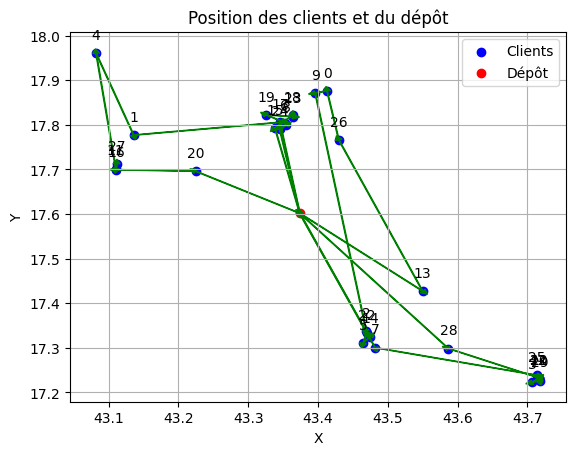

In [403]:
DEPOT = (depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])
# Tracer les positions des clients et du dépôt
plt.scatter(*zip(*client_positions), color='blue', label='Clients')
plt.scatter(*DEPOT, color='red', label='Dépôt')
for i, (x, y) in enumerate(client_positions):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i in range(n):
        current_location = DEPOT

        for client_position in bestRoute[i]:
                client_position = [client_position.x,client_position.y]
                plt.arrow(current_location[0], current_location[1], client_position[0] - current_location[0],
                        client_position[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')
                current_location = client_position
        plt.arrow(current_location[0], current_location[1], DEPOT[0] - current_location[0],
                DEPOT[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position des clients et du dépôt')
plt.grid(True)
plt.show()

In [404]:
from matplotlib import pyplot
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankIts(pop)[0][1]) #fitness du 1er de la liste
    
    for i in range(0, generations):
        print(f"Génération n{i+1}")
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankIts(pop)[0][1])
    
    pyplot.plot(progress)
    pyplot.ylabel('Distance')
    pyplot.xlabel('Generation')
    pyplot.show()

Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

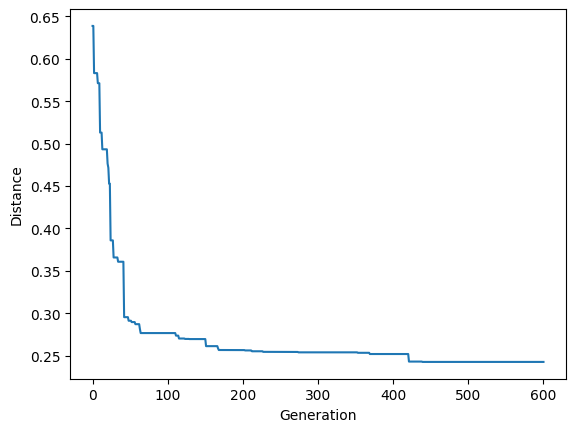

In [405]:
geneticAlgorithmPlot(population=pointsL, popSize=100, eliteSize=50, mutationRate=0.000005, generations=600)

In [406]:
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector


def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankIts(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = nouvelleGeneration(matingpool, eliteSize)
    nextGeneration = mutationPopulation(children, mutationRate)
    return nextGeneration
    
class OptGenAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.pop = initialPopulation(self.model.popSize, self.model.population)
        self.best=1 / rankIts(self.pop)[0][1]
        self.collaboratif=collaboratif
        self.bestroute = self.pop[rankIts(self.pop)[0][0]]
    '''
    si je suis collaboratif, j'entre en contact avec les autres
    je vérifie s'il y a mieux que moi, dans ce cas, je recupere le meilleur dans ma population
    '''
    def contact(self):
        min=self.best
        
        for a in self.model.schedule.agents:
            if a.best<min:
                min=a.best
                best_agent=a
                
        #si ce n'est pas moi qui détient la meilleure valeur, je la prend
        #plusieurs techniques : soit juste je remplace mon meillur, on je décale de manière à supprimer mon pire
        #je commence par une solution simple, je remplace juste mon meilleur gene
        #je trouve mon meilleur gene
        """somme=0
        for j in range(len(population[i])):
            somme+=Fitness(population[i][j]).itFitness()
            #fitnessResults[i].append((j, Fitness(population[i][j]).itFitness()))
            
        fitnessResults[i] = somme"""
        
        mon_meilleure_fitness=0
        for i in range(len(self.pop)):
            somme=0
            for j in range(len(self.pop[i])):
                somme+=Fitness(self.pop[i][j]).itFitness()
            if somme>mon_meilleure_fitness:
                mon_meilleure_fitness=somme
                mon_meilleur_gene=i
        
        #print(f"Meilleure distance : {Fitness(self.pop[mon_meilleur_gene]).itDistance()}")
        #print(f"Mon best : {self.best}")
        if min!=self.best:
            #print(f"je ne suis pas le meilleure, l'agent {a.unique_id} a une distance de {min} qui est : {best_agent.best}")
            #je cherche son meilleur gene
            son_meilleure_fitness=0
            for i in range(len(best_agent.pop)):
                somme=0
                for j in range(len(best_agent.pop[i])):
                    somme+=Fitness(best_agent.pop[i][j]).itFitness()
                if somme>son_meilleure_fitness:
                    son_meilleure_fitness=somme
                    son_meilleur_gene=i
            
            #j'échange mon meilleur avec l'autre meilleur
            self.pop[mon_meilleur_gene]=best_agent.pop[son_meilleur_gene]
            self.best=1 / rankIts(self.pop)[0][1]
            #print(f"je suis maintenant aussi le meilleure, : {self.best}")
        
    #passser d'une génération à une autre
    def step(self):
        self.pop = nextGeneration(self.pop, self.model.eliteSize, self.model.mutationRate)
        self.best=1 / rankIts(self.pop)[0][1]
        self.bestroute = self.pop[rankIts(self.pop)[0][0]]
        if self.collaboratif==True:
            self.contact()
        
        
class OptimisationCollaborativeModel(Model):

    def __init__(self, population, N=6, popSize=100, eliteSize=50, mutationRate=0.00005):
        super().__init__()
        self.population = population
        self.num_agents = N
        self.popSize = popSize
        self.eliteSize = eliteSize
        self.mutationRate = mutationRate
        
        #The scheduler
        self.schedule = SimultaneousActivation(self)
        
        # Create agents
        for i in range(int(self.num_agents/2)):
            a = OptGenAgent(i, self)
            self.schedule.add(a)
            
        for i in range(int(self.num_agents/2),self.num_agents):
            a = OptGenAgent(i, self, True)
            self.schedule.add(a)            
        
        self.datacollector = DataCollector(
            #model_reporters={"TheGlobalBest": compute_global_best},
            agent_reporters={"Best Distance": lambda a:a.best, "Best route":lambda a:a.bestroute})


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

generations=300

cityList = pointsL

model = OptimisationCollaborativeModel(cityList)

for i in range(generations):
    print(f"Génération n{i+1}")
    model.step()  
    

agent_state = model.datacollector.get_agent_vars_dataframe()
print(agent_state)


Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

        Best Distance                                                    \
AgentID             0         1         2         3         4         5   
Step                                                                      
0            0.550107  0.533837  0.611424  0.631921  0.653421  0.622555   
1            0.550107  0.533837  0.611424  0.533837  0.533837  0.533837   
2            0.550107  0.533837  0.611424  0.533837  0.533837  0.533837   
3            0.547743  0.533837  0.584374  0.533837  0.533837  0.533837   
4            0.542293  0.533837  0.584374  0.533837  0.533837  0.533837   
...               ...       ...       ...       ...       ...       ...   
295          0.268709  0.249296  0.295075  0.241827  0.241827  0.241827   
296          0.268709  0.249296  0.295075  0.241827  0.241827  0.241827   
297          0.268709  0.249296  0.295075  0.241827  0.241827  0.241827   
298          0.268709  0.249296  0.295075  0.241827  0.241827  0.241827   
299          0.268709  0.

<Axes: xlabel='Step'>

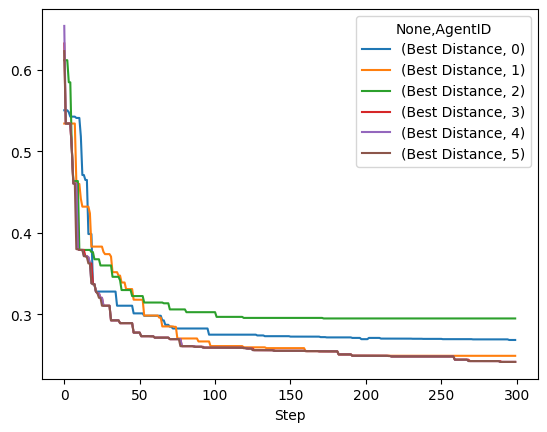

In [407]:
res=agent_state.unstack()
print(res)
res.plot()

In [408]:
res1=res['Best Distance']
res2=res['Best route']
print(res1.min().idxmin())
print(res1.idxmin()[res1.min().idxmin()])
print(res2[res1.min().idxmin()][res1.idxmin()[res1.min().idxmin()]])


3
290
[[(43.224819,17.695885), (43.11155,17.71267), (43.111171,17.69928539), (43.11036,17.70165), (43.41305,17.87588), (43.396088,17.871369), (43.429906,17.7661), (43.32605,17.82229)], [(43.475001,17.325417), (43.71342,17.23878), (43.71619,17.2317), (43.71763,17.22673), (43.70716,17.2229), (43.71657,17.23185), (43.71695937,17.23264032), (43.46991226,17.3333838)], [(43.08222786,17.96003741), (43.135963,17.776839), (43.54998018,17.42732548), (43.586910367012,17.298542261123), (43.46470189,17.31043644), (43.48189308,17.30045863), (43.46907801,17.33702249)], [(43.33841,17.79242), (43.35266,17.80444), (43.36369616,17.8181746), (43.36378,17.82157), (43.35459,17.79902), (43.34568,17.80545), (43.34521,17.7901)]]


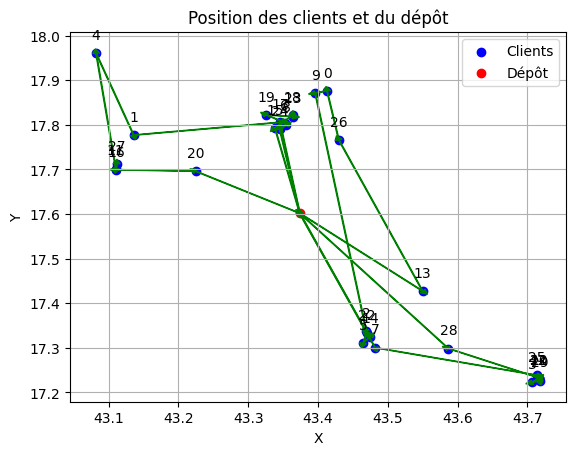

In [409]:
DEPOT = (depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])
plt.scatter(*zip(*client_positions), color='blue', label='Clients')
plt.scatter(*DEPOT, color='red', label='Dépôt')
for i, (x, y) in enumerate(client_positions):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')


for i in range(n):
        current_location = DEPOT

        for client_position in bestRoute[i]:
                client_position = [client_position.x,client_position.y]
                plt.arrow(current_location[0], current_location[1], client_position[0] - current_location[0],
                        client_position[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')
                current_location = client_position
        plt.arrow(current_location[0], current_location[1], DEPOT[0] - current_location[0],
                DEPOT[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position des clients et du dépôt')
plt.grid(True)
plt.show()